# Opentrons Mass Balance Automation 

## Aniket Chitre, Daniil Bash - AMDM Group

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Set Serial Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Real-time Data

In [3]:
def get_mass(port):
    balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
    balance.write('S\r\n'.encode('utf-8'))
    time.sleep(1)
    result  = balance.read_until('\r\n'.encode('utf-8'))
    value = str(result[7:14].decode("utf-8"))
    if (value.strip() != '-------') and (value.strip() != ''):
        return (True,float(value))
    return (False,-1)

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.0
-0.001
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.002
-0.001
0.002
0.998
0.998
0.997
0.997
1.994
1.994
1.994
1.993
2.958
2.958
2.958
2.958
3.96
3.96
3.959
3.958
4.96
4.96
4.959
4.959
5.961
5.961
5.961
5.961
6.962
6.962
6.961
7.657
7.657
7.657
8.352
8.352
8.352
8.352
9.33
9.33
9.33
9.33
10.329
10.329
10.329
10.329
11.326
11.326
11.326
11.326
12.296
12.296
12.296
12.296
13.293
13.293
13.293
13.294
14.298
14.3
14.299
14.299
15.301
15.301
15.301
15.301
16.04
16.04
16.04
16.039
16.039
16.779
16.779
16.779
17.781
17.781
17.78
17.78
18.783
18.783
18.783
18.783
19.785
19.785
19.785
19.784
20.787
20.786
20.785
20.785
21.783
21.783
21.782
21.782
22.784
22.784
22.782
23.786
23.786
23.786
24.359
24.358
24.358
24.964
24.964
24.963
24.963
25.967
25.966
25.965
25.965
25.965
26.968
26.968
26.968
27.973
27.972
27.972
27.971
28.976
28.975
28.974
28.974
29.977
29.977
29.976
29.976
30.98
30.979
30.978
30.978

60.544
60.547
60.547
60.547
60.547
60.547
60.546
60.545
60.545
60.546
60.545
60.545
60.546
60.546
60.546
60.546
60.546
60.546
60.546
60.546
60.546
60.546
60.546
60.545
60.544
60.544
60.544
60.544
60.544
60.544
60.544
60.544
60.543
60.543
60.542
60.543
60.543
60.543
60.542
60.542
60.542
60.542
60.542
60.541
60.541
60.541
60.54
60.54
60.54
60.54
60.539
60.539
60.538
60.538
60.538
60.538
60.537
60.537
60.537
60.537
60.536
60.536
60.535
60.535
60.535
60.535
60.535
60.535
60.534
60.533
60.533
60.533
60.533
60.533
60.533
60.533
60.532
60.532
60.532
60.532
60.531
60.531
60.531
60.53
60.53
60.529
60.529
60.528
60.528
60.528
60.528
60.528
60.528
60.527
60.527
60.527
60.527
60.527
60.526
60.526
60.526
60.526
60.526
60.525
60.525
60.523
60.523
60.523
60.523
60.523
60.523
60.523
60.522
60.522
60.522
60.522
60.522
60.521
60.521
60.521
60.521
60.52
60.52
60.52
60.52
60.519
60.519
60.519
60.519
60.518
60.518
60.517
60.517
60.517
60.517
60.517
60.516
60.516
60.516
60.515
60.515
60.514
60.514
60.513
60

60.242
60.242
60.242
60.242
60.241
60.241
60.24
60.24
60.24
60.239
60.239
60.239
60.238
60.238
60.238
60.238
60.238
60.237
60.237
60.237
60.236
60.236
60.236
60.236
60.235
60.235
60.235
60.235
60.235
60.235
60.235
60.235
60.235
60.234
60.234
60.233
60.232
60.233
60.233
60.233
60.232
60.232
60.231
60.231
60.231
60.231
60.231
60.231
60.23
60.23
60.23
60.23
60.23
60.23
60.229
60.228
60.228
60.228
60.227
60.226
60.226
60.226
60.226
60.226
60.226
60.226
60.225
60.225
60.225
60.224
60.224
60.224
60.224
60.224
60.223
60.223
60.223
60.223
60.223
60.223
60.222
60.222
60.221
60.221
60.22
60.22
60.22
60.22
60.22
60.22
60.219
60.219
60.219
60.218
60.218
60.218
60.218
60.217
60.217
60.217
60.216
60.216
60.216
60.216
60.216
60.216
60.215
60.215
60.214
60.214
60.214
60.214
60.214
60.213
60.213
60.213
60.213
60.213
60.213
60.212
60.211
60.211
60.211
60.208
60.209
60.211
60.212
60.212
60.21
60.21
60.21
60.208
60.208
60.207
60.207
60.207
60.207
60.207
60.206
60.206
60.206
60.206
60.206
60.206
60.206
60.

KeyboardInterrupt: 

In [7]:
results = {'Time': x, 'Mass': mass}

In [8]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
2690,5380,60.171
2691,5382,60.166
2692,5384,60.167
2693,5386,60.168


<IPython.core.display.Javascript object>


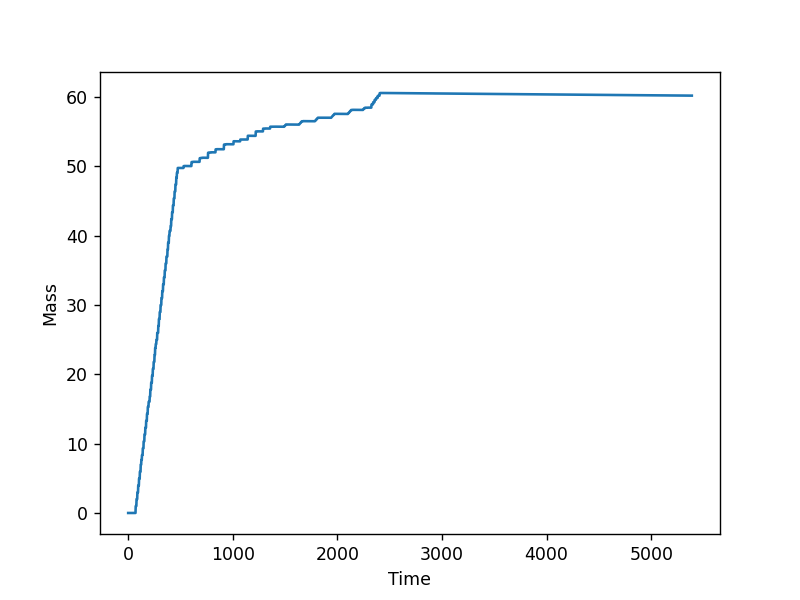

In [9]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [10]:
mass_df.to_csv('mass_data/MassProfile_141222_S31-36_run2.csv')